# Process the NYC House Value data from Zillow and Dept of Finance NYC  
Zhonghan (Jonas) Xie  
Data source: [Zillow](https://www.zillow.com/research/data/?msockid=38d5e17d86ff660f269ef545876967bd)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
nyc_neighbor_HVI_long = pd.read_csv("./data/nyc_neighbor_HVI.csv.gz", compression="gzip")

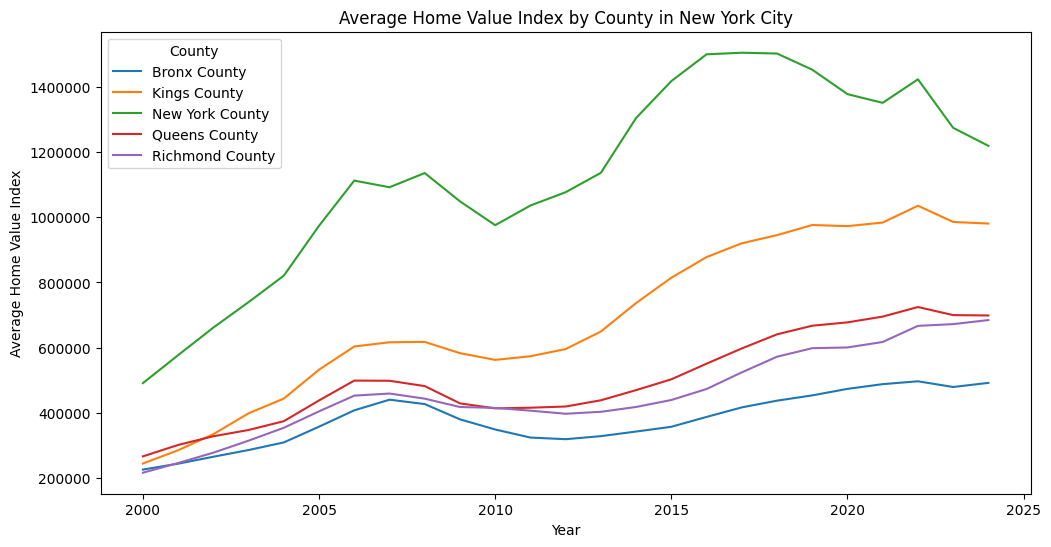

In [4]:
# Calculate the average HVI for each County by year
nyc_county_HVI_avg = (
    nyc_neighbor_HVI_long.groupby(["CountyName", "Year"]).agg({"HVI": "mean"}).reset_index()
)

# Plot the average HVI for each County by year
plt.figure(figsize=(12, 6))
sns.lineplot(data=nyc_county_HVI_avg, x="Year", y="HVI", hue="CountyName")
plt.title("Average Home Value Index by County in New York City")
plt.xlabel("Year")
plt.ylabel("Average Home Value Index")
plt.ticklabel_format(style="plain", axis="y")
plt.legend(title="County")
# plt.grid(True)
plt.show()

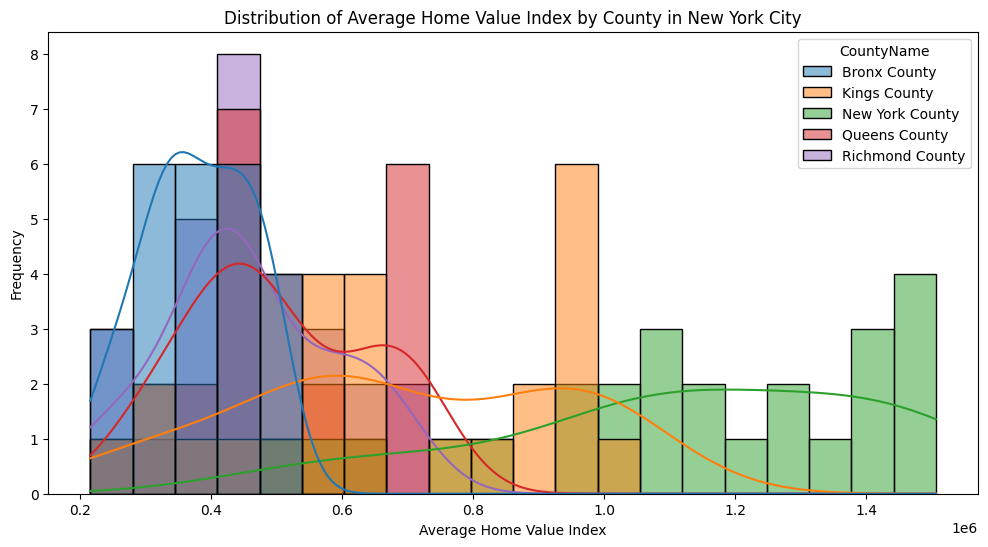

In [5]:
# Plot the histogram of the average HVI for each County
plt.figure(figsize=(12, 6))
sns.histplot(data=nyc_county_HVI_avg, x="HVI", hue="CountyName", bins=20, kde=True)
plt.title("Distribution of Average Home Value Index by County in New York City")
plt.xlabel("Average Home Value Index")
plt.ylabel("Frequency")
plt.show()

In [6]:
nyc_county_HVI_avg.head()

,CountyName,Year,HVI
0,Bronx County,2000,224911.095771
1,Bronx County,2001,243062.045115
2,Bronx County,2002,264350.206288
3,Bronx County,2003,285005.490784
4,Bronx County,2004,308358.040959


In [7]:
# write the data to a csv file
nyc_county_HVI_avg.to_csv("./data/nyc_county_HVI_avg.csv.gz", index=False, compression="gzip")

In [8]:
nyc_neighbor_HVI_long.sample(5)

,RegionID,RegionName,CountyName,Date,HVI,Year
13438,26352,Ozone Park,Queens County,2005-08-31,395223.320490,2005
38063,275518,Springfield Gardens,Queens County,2015-12-31,417047.671061,2015
7194,10957,Corona,Queens County,2003-01-31,218265.917767,2003
43825,5837,Maspeth,Queens County,2018-05-31,688238.804133,2018
27430,16920,Bay Terrace,Richmond County,2011-06-30,405250.264907,2011


## Processing Neighborhood-level Zillow HVI Data

In [9]:
neighborhood = pd.read_csv("./data/zillow_HVI_neighborhood.csv.gz", compression="gzip")
neighborhood = neighborhood[neighborhood["City"] == "New York"]
neighborhood.drop(
    ["RegionID", "RegionType", "State", "StateName", "City", "Metro"], axis=1, inplace=True
)
neighborhood["RegionName"] = neighborhood["RegionName"].str.upper()
neighborhood.rename(columns={"RegionName": "Neighborhood", "CountyName": "Borough"}, inplace=True)

In [10]:
neighborhood.sample(5)

,SizeRank,Neighborhood,Borough,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
340,357,GREENWICH VILLAGE,New York County,601462.923314,605977.366314,610528.015493,620378.096191,631097.963848,643032.736246,653043.091282,...,1.514477e+06,1.507694e+06,1.508664e+06,1.509635e+06,1.509372e+06,1.509045e+06,1.508823e+06,1.513404e+06,1.525273e+06,1.531169e+06
178,181,BAYSIDE,Queens County,289096.347146,291584.668007,293831.407350,298065.670826,301895.526725,305712.204828,309229.618617,...,8.214688e+05,8.222011e+05,8.245244e+05,8.312540e+05,8.387961e+05,8.448331e+05,8.464327e+05,8.482626e+05,8.516720e+05,8.568881e+05
2134,2223,DUMBO,Kings County,355379.539112,356577.170523,359342.390957,363412.899037,366977.987289,368045.173389,367943.482060,...,1.627170e+06,1.624093e+06,1.628085e+06,1.632981e+06,1.637225e+06,1.642635e+06,1.653199e+06,1.665175e+06,1.675436e+06,1.682652e+06
448,468,KEW GARDENS,Queens County,184333.168036,185085.523319,186363.884926,188359.881566,190096.135555,191120.890465,191760.268317,...,3.684660e+05,3.659180e+05,3.650772e+05,3.658986e+05,3.673806e+05,3.691944e+05,3.694870e+05,3.701335e+05,3.716325e+05,3.726978e+05
6166,6466,PLEASANT PLAINS,Richmond County,311882.927217,315075.293088,315312.470017,317660.698399,321381.190713,328247.013882,336188.424882,...,8.637914e+05,8.637475e+05,8.662006e+05,8.720093e+05,8.773768e+05,8.833933e+05,8.858840e+05,8.872452e+05,8.874963e+05,8.897090e+05


In [11]:
# Transform the data from wide to long format
neighbor_long = neighborhood.melt(
    id_vars=["Neighborhood", "Borough", "SizeRank"], var_name="Time", value_name="HVI"
)

# Transform the time to date format and extract the year
neighbor_long["Time"] = pd.to_datetime(neighbor_long["Time"], format="%Y-%m-%d")
neighbor_long["Year"] = neighbor_long["Time"].dt.year

neighbor_hvi_agg = neighbor_long.groupby(["Borough", "Neighborhood", "Year"]).agg({"HVI": "mean"}).reset_index()

neighbor_hvi_agg.sample(5)

,Borough,Neighborhood,Year,HVI
852,Kings County,BOERUM HILL,2002,562957.554148
4454,Richmond County,PLEASANT PLAINS,2004,537197.569041
824,Kings County,BENSONHURST,2024,905381.345070
4188,Richmond County,HUGUENOT,2013,400733.861887
645,Bronx County,VAN NEST,2020,547837.660157


In [12]:
# Process specific neighborhoods to match the DOF data
## Combine the NORWOOD and BEDFORD PARK, calculate the combined HVI each year
norwood_bedford = neighbor_hvi_agg[neighbor_hvi_agg['Neighborhood'].isin(['NORWOOD', 'BEDFORD PARK'])]
norwood_bedford = norwood_bedford.groupby(['Year']).agg({'HVI': 'mean'}).reset_index()
norwood_bedford['Neighborhood'] = 'BEDFORD PARK/NORWOOD'
norwood_bedford['Borough'] = 'Bronx County'

## Combine CONCOURSE and MELROSE
concourse_melrose = neighbor_hvi_agg[neighbor_hvi_agg['Neighborhood'].isin(['CONCOURSE', 'MELROSE'])]
concourse_melrose = concourse_melrose.groupby(['Year']).agg({'HVI': 'mean'}).reset_index()
concourse_melrose['Neighborhood'] = 'MELROSE/CONCOURSE'
concourse_melrose['Borough'] = 'Bronx County'

## Combine MORRIS PARK and VAN NEST
morris_park_van_nest = neighbor_hvi_agg[neighbor_hvi_agg['Neighborhood'].isin(['MORRIS PARK', 'VAN NEST'])]
morris_park_van_nest = morris_park_van_nest.groupby(['Year']).agg({'HVI': 'mean'}).reset_index()
morris_park_van_nest['Neighborhood'] = 'MORRIS PARK/VAN NEST'
morris_park_van_nest['Borough'] = 'Bronx County'

## Combine MORRIS HEIGHTS and HIGHBRIDGE
morris_heights_highbridge = neighbor_hvi_agg[neighbor_hvi_agg['Neighborhood'].isin(['MORRIS HEIGHTS', 'HIGHBRIDGE'])]
morris_heights_highbridge = morris_heights_highbridge.groupby(['Year']).agg({'HVI': 'mean'}).reset_index()
morris_heights_highbridge['Neighborhood'] = 'HIGHBRIDGE/MORRIS HEIGHTS'
morris_heights_highbridge['Borough'] = 'Bronx County'

# add to the original data
neighbor_hvi_agg = pd.concat([neighbor_hvi_agg, norwood_bedford, concourse_melrose, morris_park_van_nest, morris_heights_highbridge], ignore_index=True)

In [13]:
# Read in DOF neighborhood sales data
neighbor_sales = pd.read_csv("./data/DOF_Summary_of_Neighborhood_Sales.csv")

neighbor_sales.sample(5)

# Aggregate the sales data by neighborhood and year
neighbor_sales_agg = (
    neighbor_sales.groupby(["NEIGHBORHOOD", "YEAR"]).agg(
        {
            "NUMBER OF SALES": "sum",
            "AVERAGE SALE PRICE": "mean",
            "MEDIAN SALE PRICE": "median",
            "LOWEST SALE PRICE": "min",
            "HIGHEST SALE PRICE": "max",
        }
    ).reset_index()
)

# Change the column names to capital the first letter
neighbor_sales_agg.columns = [
    col.title() for col in neighbor_sales_agg.columns
]

neighbor_sales_agg.sample(5)

,Neighborhood,Year,Number Of Sales,Average Sale Price,Median Sale Price,Lowest Sale Price,Highest Sale Price
1979,OAKLAND GARDENS,2019,68,1.255865e+06,1450000.0,250000,1870000
1256,GREENWICH VILLAGE-WEST,2017,21,1.192884e+07,9150000.0,3950000,27400000
570,CO-OP CITY,2016,1,4.300000e+05,430000.0,430000,430000
500,CHELSEA,2013,12,6.168458e+06,6245000.0,2500000,15500000
2741,UPPER WEST SIDE (59-79),2015,6,1.257278e+07,14125000.0,7750000,18500000


In [14]:
# Select the rows of neighborhoods with / in the neighborhood name
neighbor_sales_agg['Neighborhood'][neighbor_sales_agg["Neighborhood"].str.contains("/")].unique()


array(['BEDFORD PARK/NORWOOD', 'CASTLE HILL/UNIONPORT',
       'HIGHBRIDGE/MORRIS HEIGHTS', 'KINGSBRIDGE HTS/UNIV HTS',
       'KINGSBRIDGE/JEROME PARK', 'MELROSE/CONCOURSE',
       'MORRIS PARK/VAN NEST', 'MORRISANIA/LONGWOOD',
       'MOTT HAVEN/PORT MORRIS', 'MOUNT HOPE/MOUNT EDEN',
       'SCHUYLERVILLE/PELHAM BAY'], dtype=object)

In [15]:
# Use fuzzy matching to match the neighborhood names
from fuzzywuzzy import process
from pprint import pprint

def find_best_match(name_1, name_2):
    match, score = process.extractOne(name_1, name_2)
    return match, score

In [16]:
dof_names = neighbor_sales_agg["Neighborhood"].unique()
zillow_names = neighbor_hvi_agg["Neighborhood"].unique()

# Use fuzzy match to find the best match
match_dict = {}
for dof_name in dof_names:
    if "UPPER EAST SIDE" in dof_name:
        match_dict[dof_name] = "UPPER EAST SIDE"
        continue
    if "UPPER WEST SIDE" in dof_name:
        match_dict[dof_name] = "UPPER WEST SIDE"
        continue
    match, score = find_best_match(dof_name, zillow_names)
    if score > 90:
        match_dict[dof_name] = match



In [17]:
match_dict['CASTLE HILL/UNIONPORT'] = 'CASTLE HILL'
match_dict['HARLEM-EAST'] = 'EAST HARLEM'
match_dict['FLATBUSH-EAST'] = 'EAST FLATBUSH'
match_dict['NEW BRIGHTON-ST. GEORGE'] = 'ST.GEORGE'
match_dict['NEW DORP-BEACH'] = 'NEW DORP BEACH'
match_dict['NEW DORP-HEIGHTS'] = 'NEW DORP'
match_dict['ROSSVILLE-CHARLESTON'] = 'CHARLESTON'
match_dict['ROSSVILLE-RICHMOND VALLEY'] = 'RICHMOND VALLEY'
match_dict['STAPLETON-CLIFTON'] = 'CLIFTON'
match_dict['WILLIAMSBURG-CENTRAL'] = 'WILLIAMSBURG'
match_dict['WILLIAMSBURG-NORTH'] = 'WILLIAMSBURG'
match_dict['WILLIAMSBURG-SOUTH'] = 'WILLIAMSBURG'
match_dict['KINGSBRIDGE/JEROME PARK'] = 'KINGSBRIDGE'
match_dict['MORRISANIA/LONGWOOD'] = 'LONGWOOD'
match_dict['MOTT HAVEN/PORT MORRIS'] = 'MOTT HAVEN'
match_dict['SCHUYLERVILLE/PELHAM BAY'] = 'PELHAM BAY'


# select those unmatched neighborhoods out of dof_names
unmatched = [name for name in dof_names if name not in match_dict.keys()]

for name in unmatched:
    if "-" in name:
        name_split = name.split("-")[0]
        if name_split in zillow_names:
            match_dict[name] = name_split

# Select those with - in the name
unmatched_sub = [name for name in dof_names if name not in match_dict.keys()]

pprint(unmatched_sub)

['AIRPORT LA GUARDIA',
 'ALPHABET CITY',
 'ARVERNE',
 'BATHGATE',
 'BEECHHURST',
 'BLOOMFIELD',
 'BREEZY POINT',
 'BRONX PARK',
 'BRONXDALE',
 'BROOKLYN-UNKNOWN',
 'BUSH TERMINAL',
 'CHINATOWN',
 'CLINTON',
 'CLOVE LAKES',
 'CO-OP CITY',
 'CONCORD',
 'CONCORD-FOX HILLS',
 'CROTONA PARK',
 'CYPRESS HILLS',
 'FASHION',
 'FIELDSTON',
 'FLATIRON',
 'FLUSHING MEADOW PARK',
 'FRESH KILLS',
 'HAMMELS',
 'HILLCREST',
 'HOLLIS HILLS',
 'HOLLISWOOD',
 'HUNTS POINT',
 'JAMAICA BAY',
 'JAVITS CENTER',
 'KINGSBRIDGE HTS/UNIV HTS',
 'KIPS BAY',
 'LITTLE NECK',
 'LIVINGSTON',
 'MADISON',
 'MANHATTAN VALLEY',
 'MANOR HEIGHTS',
 'MIDTOWN EAST',
 'MIDTOWN WEST',
 'MOUNT HOPE/MOUNT EDEN',
 'NAVY YARD',
 'OCEAN HILL',
 'OCEAN PARKWAY-NORTH',
 'OCEAN PARKWAY-SOUTH',
 'PARK SLOPE SOUTH',
 'PELHAM PARKWAY NORTH',
 'PELHAM PARKWAY SOUTH',
 'PORT IVORY',
 'QUEENS-UNKNOWN',
 'RICHMONDTOWN-LIGHTHS HILL',
 'SEAGATE',
 'SO. JAMAICA-BAISLEY PARK',
 'SOUTH JAMAICA',
 'SOUTHBRIDGE',
 'SPRING CREEK',
 'STATEN ISLAND-U

In [20]:
# Create a mapping dataframe
mapping_df = pd.DataFrame(data=dof_names, columns=["DOF_Neighborhood"])
mapping_df["zillow_neighborhood"] = mapping_df["DOF_Neighborhood"].map(match_dict)

In [28]:
nta_2020_df = pd.read_csv("./data/2020_NTA.csv")

In [29]:
nta_names = nta_2020_df["NTAName"].unique()
nta_match_df = pd.DataFrame(data=nta_names, columns=["NTAName"])
nta_match_df['NTAName'] = nta_match_df['NTAName'].str.upper()

In [32]:
nta_match_df[['dof_neighborhood', 'score']] = nta_match_df["NTAName"].apply(lambda x: pd.Series(find_best_match(x, dof_names)))

In [17]:
# Apply the mapping to the neighborhood names, create a separate column for the matched names
neighbor_sales = neighbor_sales_agg.copy()
neighbor_sales["Match"] = neighbor_sales["Neighborhood"].map(match_dict)


In [20]:
neighbor_sales_match = pd.merge(neighbor_sales, neighbor_hvi_agg, left_on=["Match", "Year"], right_on=["Neighborhood", "Year"], how="left")
neighbor_sales_match.drop("Neighborhood_y", axis=1, inplace=True)
neighbor_sales_match.rename(columns={"Neighborhood_x": "Neighborhood"}, inplace=True)
neighbor_sales_match.columns

Index(['Neighborhood', 'Year', 'Number Of Sales', 'Average Sale Price',
       'Median Sale Price', 'Lowest Sale Price', 'Highest Sale Price', 'Match',
       'Borough', 'HVI'],
      dtype='object')

In [23]:
neighbor_sales_match.to_csv("./data/cleaned_neighbor_sales.csv", index = False)

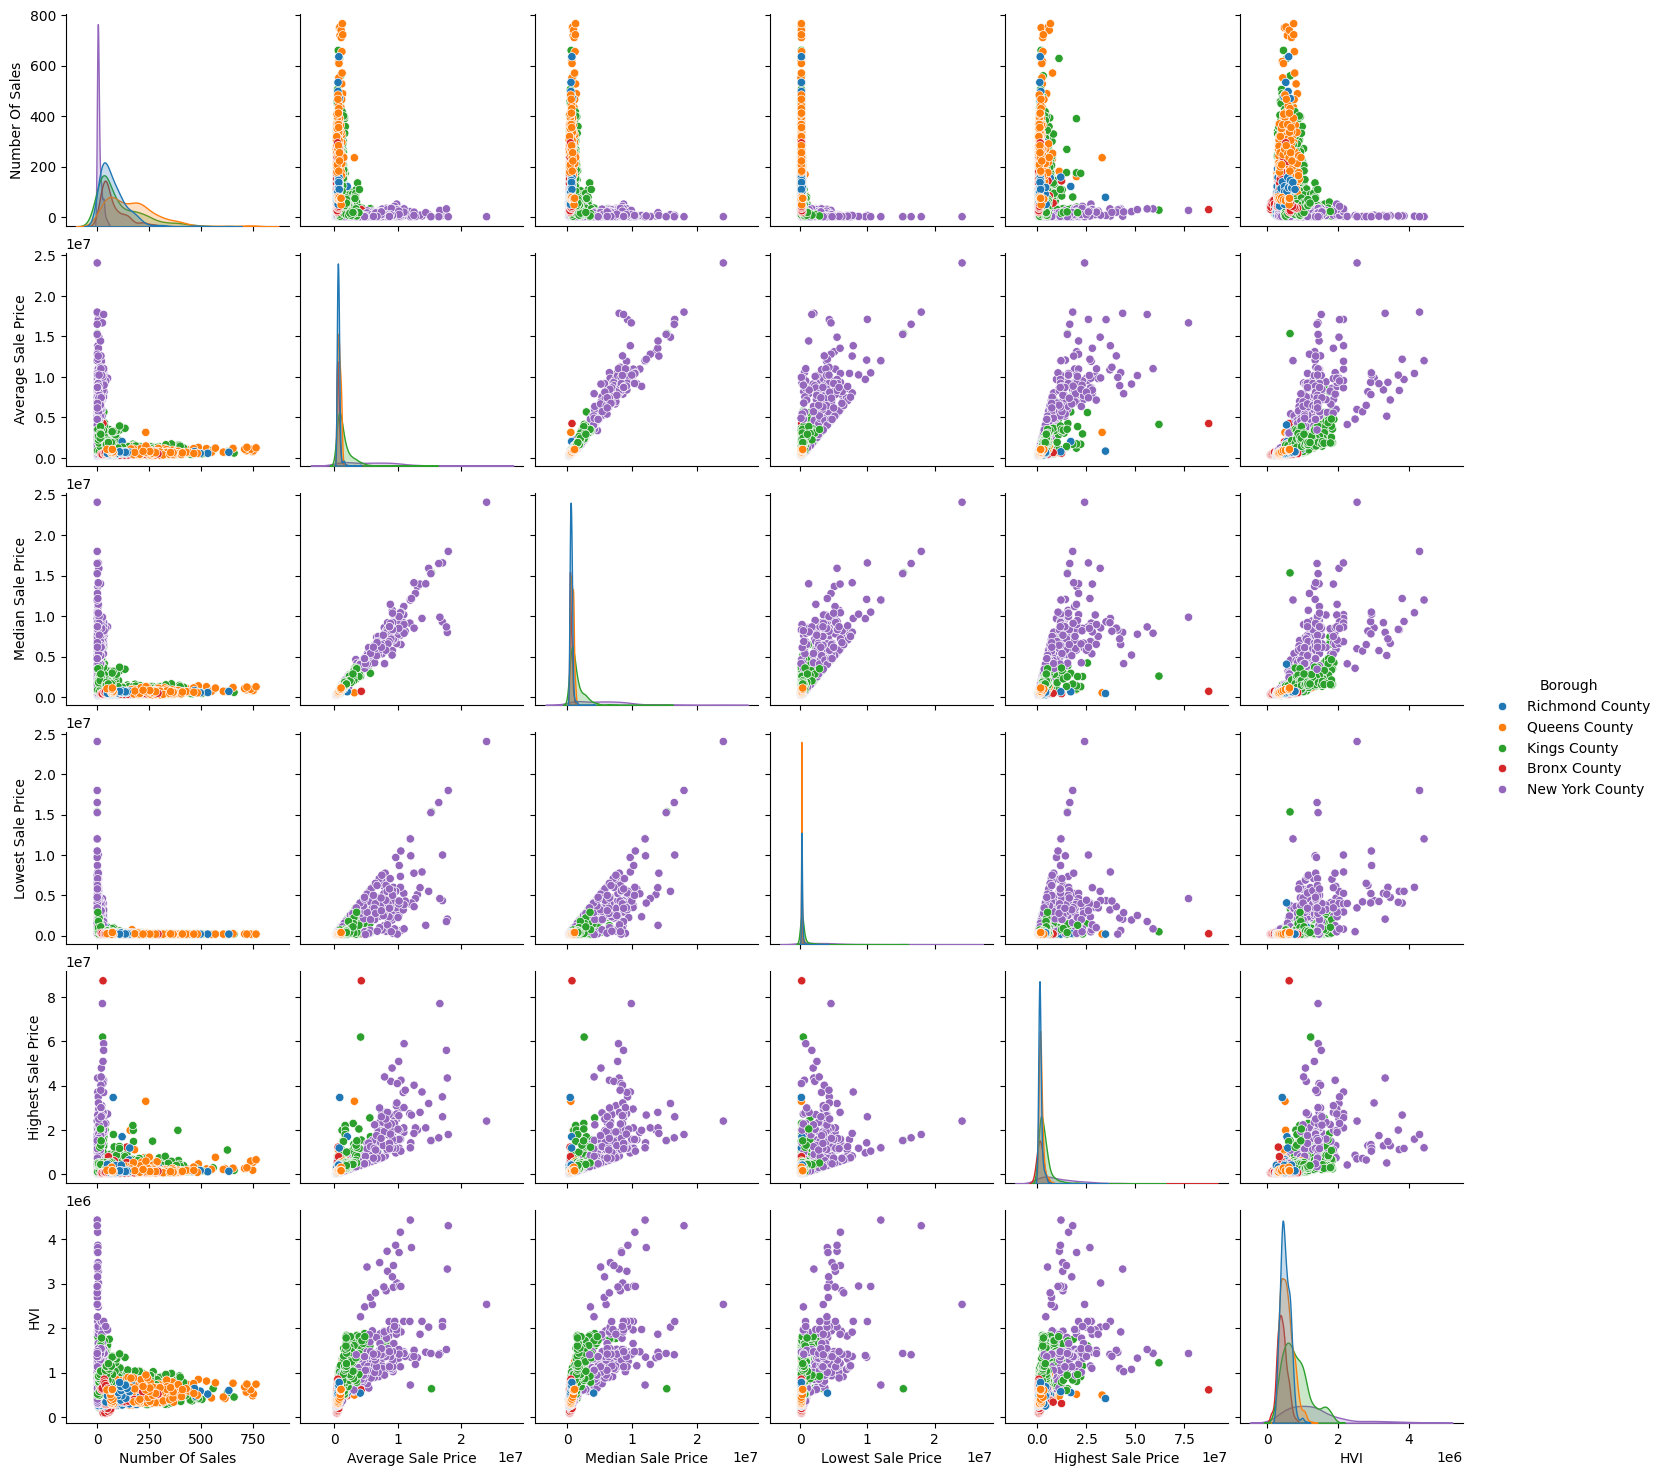

In [21]:
# Draw a pairplot to check the relationship between the sales data and HVI
feature = ["Number Of Sales", "Average Sale Price", "Median Sale Price", "Lowest Sale Price", "Highest Sale Price", "HVI"]
sns.pairplot(neighbor_sales_match, vars=feature, hue="Borough", diag_kind="kde")

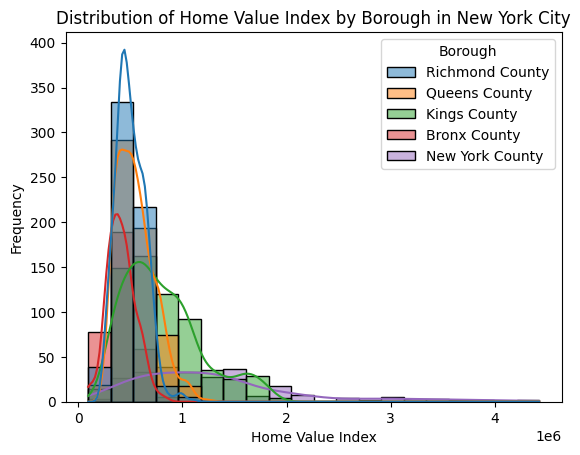

In [22]:
sns.histplot(data=neighbor_sales_match, x="HVI", hue="Borough", bins=20, kde=True)
plt.title("Distribution of Home Value Index by Borough in New York City")
plt.xlabel("Home Value Index")
plt.ylabel("Frequency")
plt.show()